[0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1
 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0
 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1]


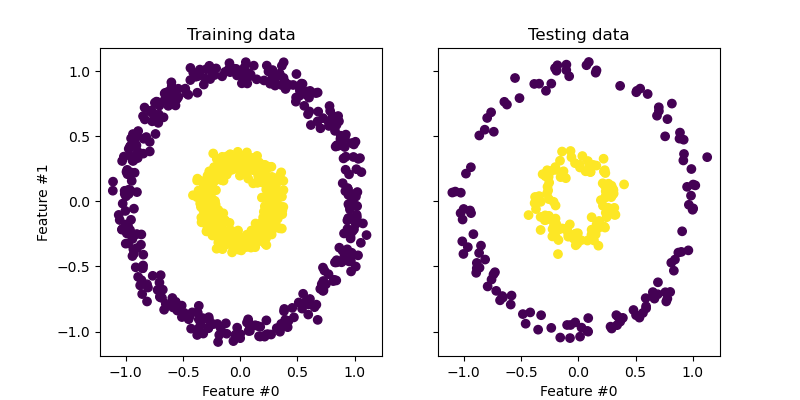

In [24]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib widget

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

As it is, the data is not linearly separable.
We could come up with a fairly simple transformation into 3D resulting in a linearly separable datset.

Let $\phi(\mathbf{x}) = (x_1^2, x_2^2, \sqrt{2}x_1x_2)$.

In [2]:
def feature_transform(x):
    return np.vstack((x[:, 0]**2, x[:, 1]**2, np.sqrt(2) * x[:, 0] * x[:, 1])).T

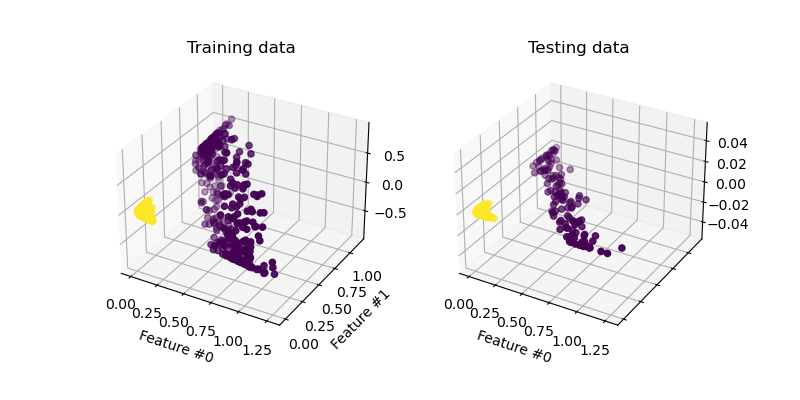

In [3]:
X_train_k = feature_transform(X_train)
X_test_k = feature_transform(X_test)

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4), subplot_kw=dict(projection='3d'))

train_ax.scatter(X_train_k[:, 0], X_train_k[:, 1], X_train_k[:, 2], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test_k[:, 0], X_test_k[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

This is not the only feature transform which would work with our dataset.
There also exist datasets which would need a much higher dimensional transform.
The **kernel trick** permits a comparison in the transform space without needing to explicitly compute the transformation.

In the above example, our transform is defined as

$$
\phi(\mathbf{x}) = (x_1^2, x_2^2, \sqrt{2}x_1x_2).
$$

This corresponds to the kernel

\begin{align*}
k(\mathbf{x}, \mathbf{x}') &= (\mathbf{x}^T\mathbf{x}')^2\\
&= (x_1x'_1 + x_2x'_2)^2\\
&= 2x_1x'_1x_2x'_2 + (x_1x'_1)^2 + (x_2x'_2)^2\\
&= \phi(\mathbf{x})^T \phi(\mathbf{x}')
\end{align*}

where

$$
\phi(\mathbf{x}) =
\begin{bmatrix}
\sqrt{2}x_1x_2\\
x_1^2\\
x_2^2
\end{bmatrix}.
$$

<AxesSubplot:>

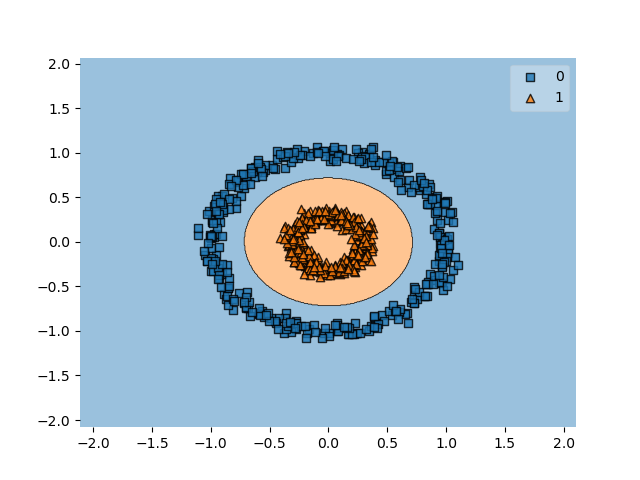

In [29]:
from matplotlib.colors import ListedColormap
from mlxtend.plotting.decision_regions import plot_decision_regions
from sklearn.linear_model import LogisticRegression

class KernelRegression():
    def __init__(self):
        self.clf = LogisticRegression()

    def predict(self, x):
        x = feature_transform(x)
        x = self.phi @ x.T
        return self.clf.predict(x.T)

    def fit(self, X, Y):
        X = feature_transform(X)
        K = X @ X.T
        self.phi = X
        self.clf.fit(K, Y)

model = KernelRegression()
model.fit(X_train, y_train)

fig = plt.figure()
ax = plot_decision_regions(X_train, y_train, model)
fig.add_subplot(ax)